In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m 
from pprint import pprint

In [16]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

# 1. Data Description

In [86]:
df = pd.read_csv('../Dataset/Raw/historical_data.csv')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['actual_delivery_hour'] = df['actual_delivery_time'].dt.hour
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at_hour'] = df['created_at'].dt.hour
df.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery_hour,created_at_hour
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,23.0,22
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,22.0,21
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,21.0,20
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,22.0,21
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,3.0,2
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,21.0,20
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0,2.0,2
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,3.0,3
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,0.0,0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0,2.0,1


In [18]:
df_stats_describe = df.describe()
df_stats_describe

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428,197421,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000
std,1.524867,NaN,NaN,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902


In [19]:
df_info = df.info()
pprint(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [20]:
null_count = df.isna().sum()
pprint(null_count)

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64


In [21]:
for i in df.columns:
    if null_count[i] >= 0.05 * df.count()[i]:
        print(bcolors.FAIL+f"The percentage of nulls in {i} column are: {round(null_count[i]*100/df.count()[i])}%"+bcolors.ENDC)
    else:
        print(bcolors.OKGREEN+f"The percentage of nulls in {i} column are: {round(null_count[i]*100/df.count()[i])}%"+bcolors.ENDC)

The percentage of nulls in market_id column are: 1%
The percentage of nulls in created_at column are: 0%
The percentage of nulls in actual_delivery_time column are: 0%
The percentage of nulls in store_id column are: 0%
The percentage of nulls in store_primary_category column are: 2%
The percentage of nulls in order_protocol column are: 1%
The percentage of nulls in total_items column are: 0%
The percentage of nulls in subtotal column are: 0%
The percentage of nulls in num_distinct_items column are: 0%
The percentage of nulls in min_item_price column are: 0%
The percentage of nulls in max_item_price column are: 0%
The percentage of nulls in total_onshift_dashers column are: 9%
The percentage of nulls in total_busy_dashers column are: 9%
The percentage of nulls in total_outstanding_orders column are: 9%
The percentage of nulls in estimated_order_place_duration column are: 0%
The percentage of nulls in estimated_store_to_consumer_driving_duration column are: 0%


# 2. Data Cleansing

C:\Users\Fayaz Shaikh\AppData\Local\Temp\ipykernel_5768\2379868230.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[index].set_xticklabels(df_gpb.index, rotation=90, ha='right')
C:\Users\Fayaz Shaikh\AppData\Local\Temp\ipykernel_5768\2379868230.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[index].set_xticklabels(df_gpb.index, rotation=90, ha='right')
C:\Users\Fayaz Shaikh\AppData\Local\Temp\ipykernel_5768\2379868230.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[index].set_xticklabels(df_gpb.index, rotation=90, ha='right')
C:\Users\Fayaz Shaikh\AppData\Local\Temp\ipykernel_5768\2379868230.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[index].set_xticklabels(df_gpb.index, rotation=90, ha='right')
C:\Users\Fayaz Shaikh\AppData\Local\Temp\ipykernel_5768\2379868230.py:34: UserWarning: FixedFormatter should only be used togeth

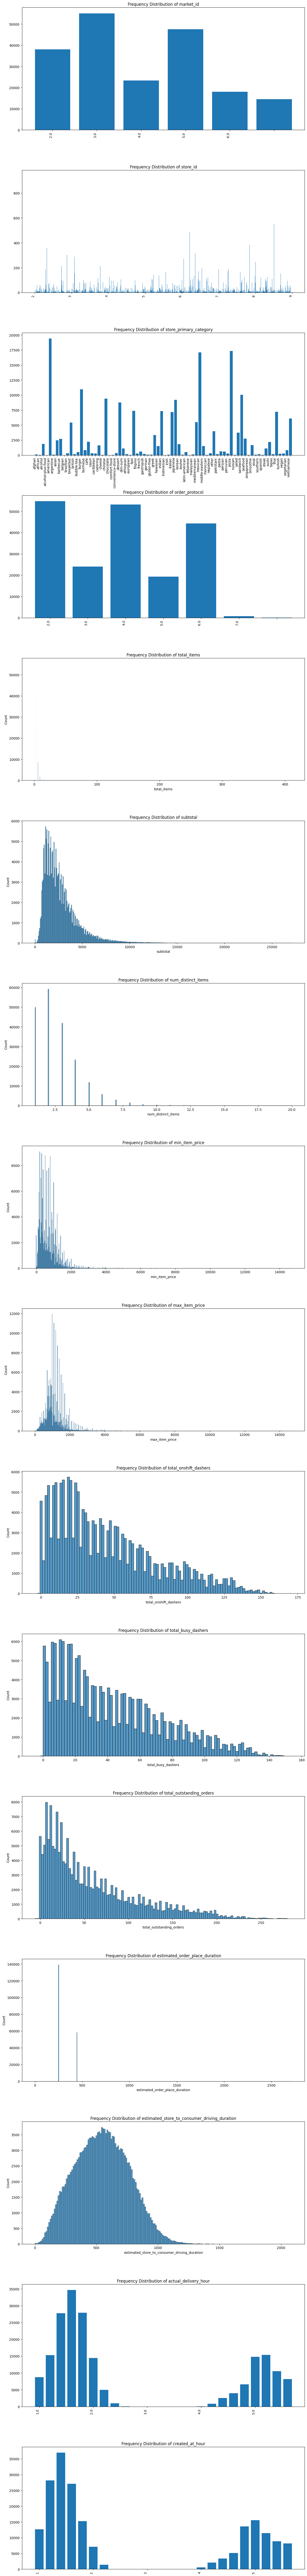

In [97]:
df_columns = pd.DataFrame({'dtype': [""]*len(df.columns)}, index=list(df.columns))
df_columns.loc['market_id', 'dtype'] = 'categorical'
df_columns.loc['created_at_hour', 'dtype'] = 'timestamp'
df_columns.loc['actual_delivery_hour', 'dtype'] = 'timestamp'
df_columns.loc['store_id', 'dtype'] = 'categorical'
df_columns.loc['store_primary_category', 'dtype'] = 'categorical'
df_columns.loc['order_protocol', 'dtype'] = 'categorical'
df_columns.loc['total_items', 'dtype'] = 'numeric'
df_columns.loc['subtotal', 'dtype'] = 'numeric'
df_columns.loc['num_distinct_items', 'dtype'] = 'numeric'
df_columns.loc['min_item_price', 'dtype'] = 'numeric'
df_columns.loc['max_item_price', 'dtype'] = 'numeric'
df_columns.loc['total_onshift_dashers', 'dtype'] = 'numeric'
df_columns.loc['total_busy_dashers', 'dtype'] = 'numeric'
df_columns.loc['total_outstanding_orders', 'dtype'] = 'numeric'
df_columns.loc['estimated_order_place_duration', 'dtype'] = 'numeric'
df_columns.loc['estimated_store_to_consumer_driving_duration', 'dtype'] = 'numeric'
df_columns.drop(index=['created_at', 'actual_delivery_time'], inplace=True)

figures, axes = plt.subplots(len(df_columns.index), figsize=(15,110))
figures.tight_layout(pad=10.0)
for index, col in enumerate(df_columns.index):
    if df_columns.loc[col, 'dtype'] == 'numeric':
        sns.histplot(df[col], ax=axes[index])
        axes[index].set_title(f"Frequency Distribution of {col}")
    elif df_columns.loc[col, 'dtype'] == 'categorical':
        df_gpb = df.groupby([col]).count()['created_at']
        axes[index].bar(x=df_gpb.index,height=list(df_gpb))
        axes[index].set_xticklabels(df_gpb.index, rotation=90, ha='right')
        axes[index].set_title(f"Frequency Distribution of {col}")
    elif df_columns.loc[col, 'dtype'] =='timestamp':
        df_gpb = df.groupby([col]).count()['store_id']
        axes[index].bar(x=df_gpb.index,height=list(df_gpb))
        axes[index].set_xticklabels(df_gpb.index, rotation=90, ha='right')
        axes[index].set_title(f"Frequency Distribution of {col}")

plt.show()